In [89]:
import pandas as pd

# Load the .txt file
df = pd.read_csv("C:/Users/dell/Desktop/project/household_energy_usage/household_power_consumption.txt", sep=';', low_memory=False, na_values='?')

# Combine Date and Time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)

# Drop original Date and Time columns
df.drop(columns=['Date', 'Time'], inplace=True)

In [91]:
(df.isnull().mean()*100).sort_values(ascending=False)

Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
Datetime                 0.000000
dtype: float64

In [93]:
before = len(df)
df = df[~df.drop(columns=['Datetime']).isnull().all(axis=1)]
after = len(df)
print(f"Dropped {before - after} rows with only datetime present.")

Dropped 25979 rows with only datetime present.


In [95]:
(df.isnull().mean()*100).sort_values(ascending=False)

Global_active_power      0.0
Global_reactive_power    0.0
Voltage                  0.0
Global_intensity         0.0
Sub_metering_1           0.0
Sub_metering_2           0.0
Sub_metering_3           0.0
Datetime                 0.0
dtype: float64

In [75]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


In [97]:
df['hour'] = df['Datetime'].dt.hour
df['day'] = df['Datetime'].dt.day
df['month'] = df['Datetime'].dt.month
df['weekday'] = df['Datetime'].dt.weekday

In [99]:
daily_avg = df.groupby(df['Datetime'].dt.date)['Global_active_power'].mean()

In [ ]:
daily_avg

In [101]:
df['daily_avg_power'] = df['Datetime'].dt.date.map(daily_avg).round(2)

In [19]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,hour,day,month,weekday,daily_avg_power
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,17,16,12,5,3.05
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,17,16,12,5,3.05
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,17,16,12,5,3.05
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,17,16,12,5,3.05
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,17,16,12,5,3.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,20,26,11,4,1.18
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,20,26,11,4,1.18
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,21,26,11,4,1.18
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,21,26,11,4,1.18


In [103]:
df['is_peak_hour'] = df['hour'].apply(lambda x: 1 if(x >= 6 and x <=10) or (x >=17 and x <= 21) else 0)

In [63]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,hour,day,month,weekday,daily_avg_power,is_peak_hour
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,17,16,12,5,3.05,1
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,17,16,12,5,3.05,1
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,17,16,12,5,3.05,1
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,17,16,12,5,3.05,1
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,17,16,12,5,3.05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,20,26,11,4,1.18,1
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,20,26,11,4,1.18,1
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,21,26,11,4,1.18,1
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,21,26,11,4,1.18,1


In [105]:
df.set_index('Datetime', inplace=True)
df['rolling_60min_avg'] = df['Global_active_power'].rolling('60T', min_periods=1).mean().round(2)

C:\Users\dell\AppData\Local\Temp\ipykernel_17188\4223215416.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['rolling_60min_avg'] = df['Global_active_power'].rolling('60T', min_periods=1).mean().round(2)


In [23]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,month,weekday,daily_avg_power,rolling_60min_avg
Datetime,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,17,16,12,5,3.05,4.22
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17,16,12,5,3.05,4.79
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,17,16,12,5,3.05,4.98
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,17,16,12,5,3.05,5.08
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,17,16,12,5,3.05,4.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,20,26,11,4,1.18,1.17
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,20,26,11,4,1.18,1.16
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,21,26,11,4,1.18,1.16


In [21]:
print(df.isnull().sum())


Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
hour                     0
day                      0
month                    0
weekday                  0
daily_avg_power          0
is_peak_hour             0
rolling_60min_avg        0
dtype: int64


<Axes: >

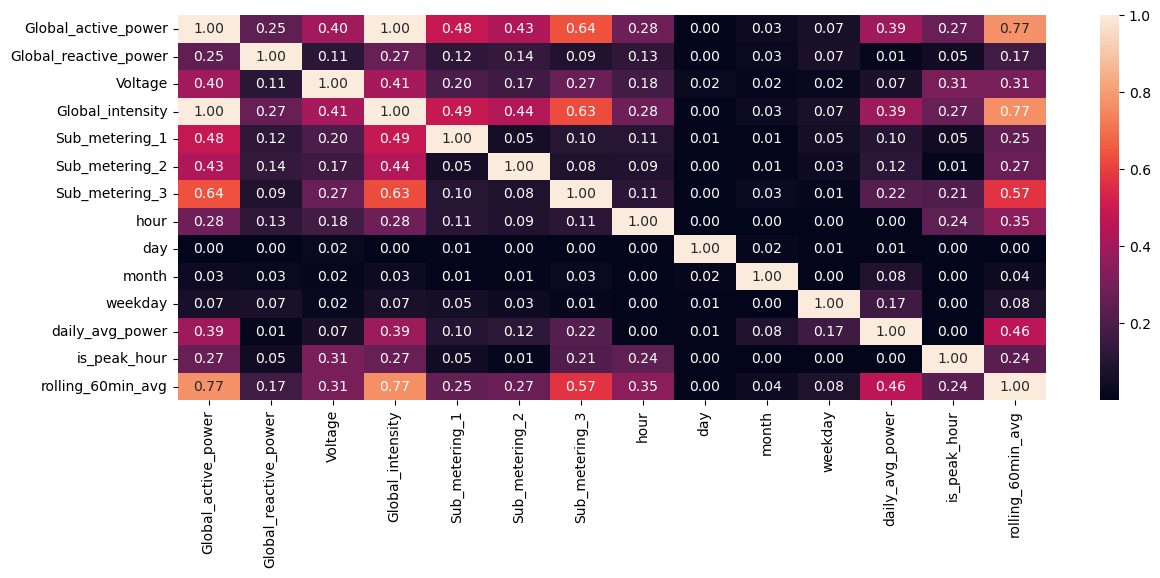

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation 
corr = df.corr()
plt.figure(figsize=(14, 5))
sns.heatmap(abs(corr), annot= True, fmt=".2f")

In [31]:
col_to_drop = ["Global_intensity","rolling_60min_avg"]
df.drop(col_to_drop, axis= 1, inplace= True)

KeyError: "['Global_intensity', 'rolling_60min_avg'] not found in axis"

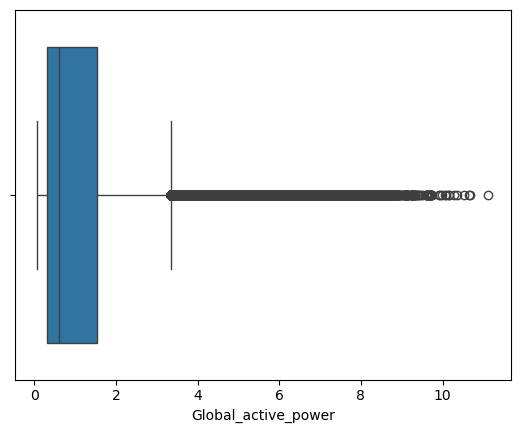

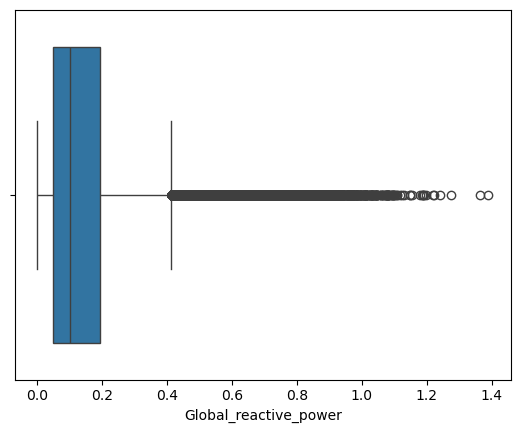

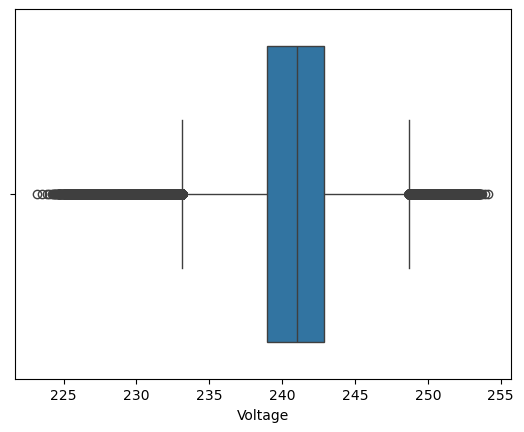

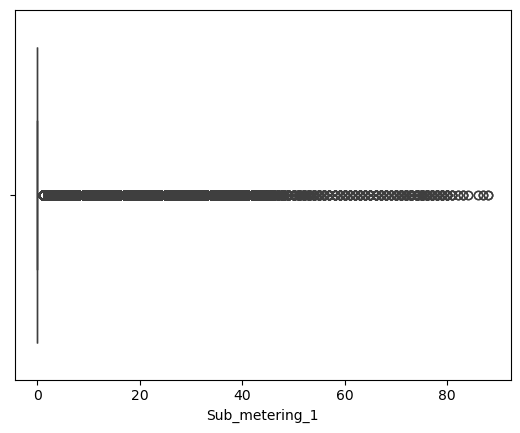

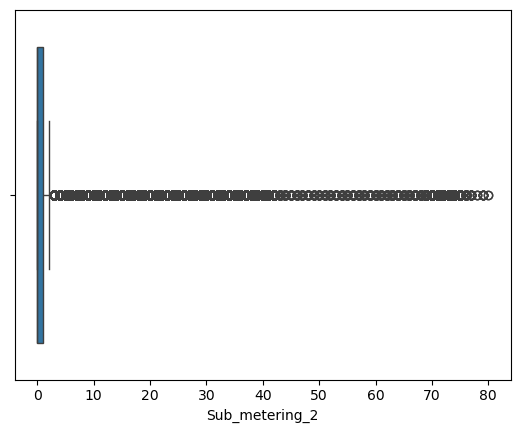

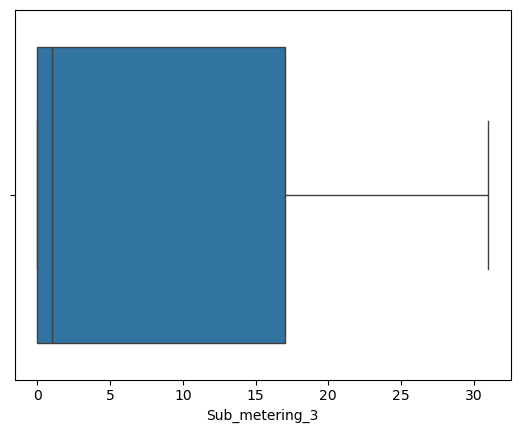

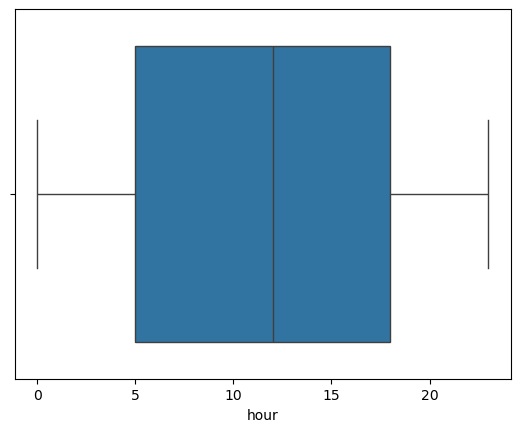

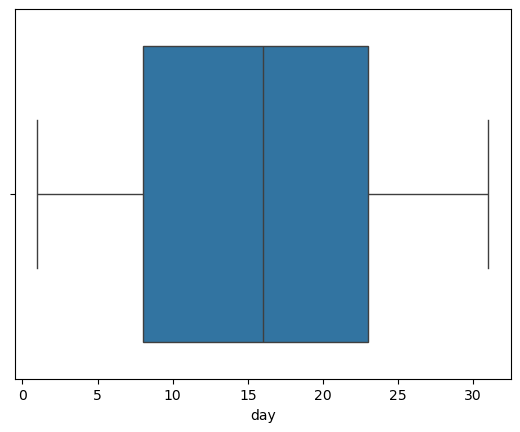

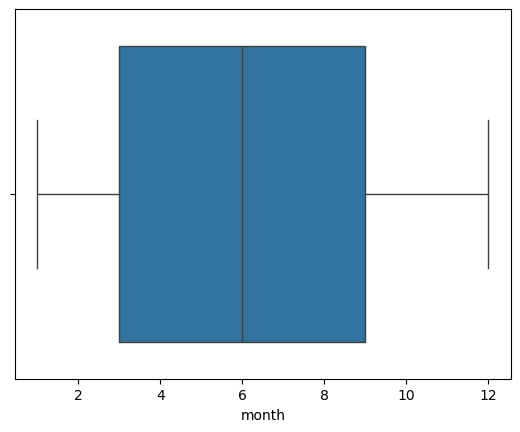

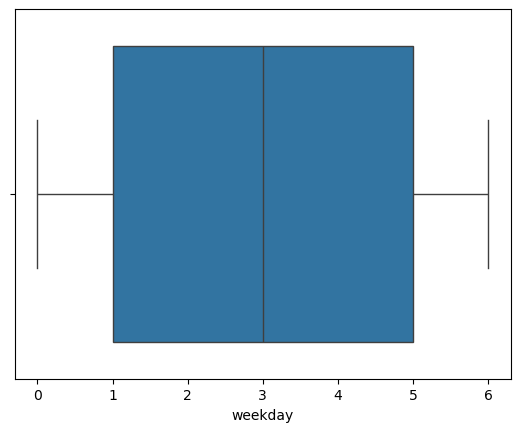

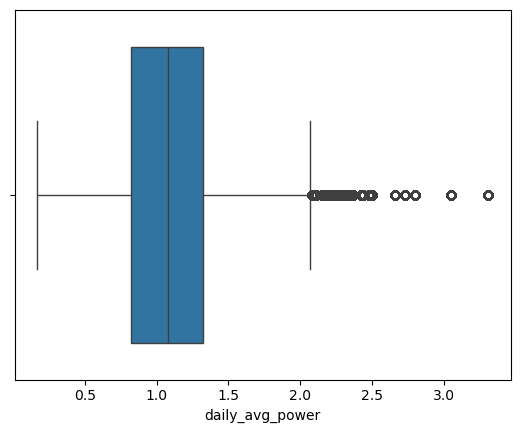

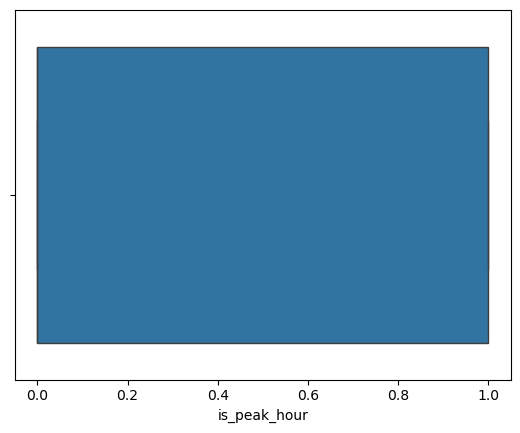

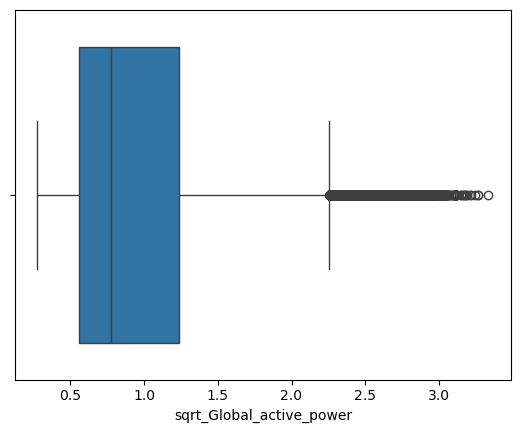

In [37]:
import seaborn as sns 
# check outliers on all columns
for i in df.columns:
    sns.boxplot(data=df, x=df[i])
    plt.show()

<Axes: xlabel='sqrt_Global_active_power'>

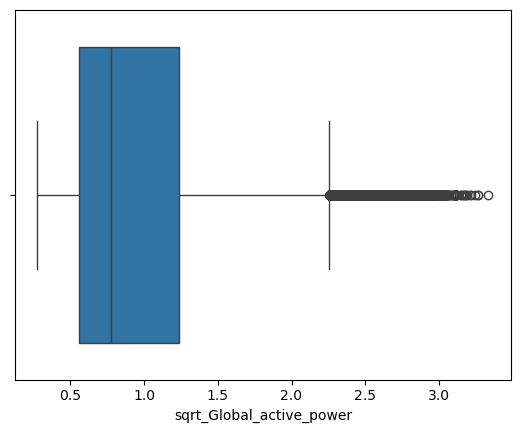

In [109]:
import numpy as np
# Treat outliers
df['sqrt_Global_active_power'] = np.sqrt(df['Global_active_power'])
sns.boxplot(data=df, x='sqrt_Global_active_power')

<Axes: xlabel='log_Global_active_power'>

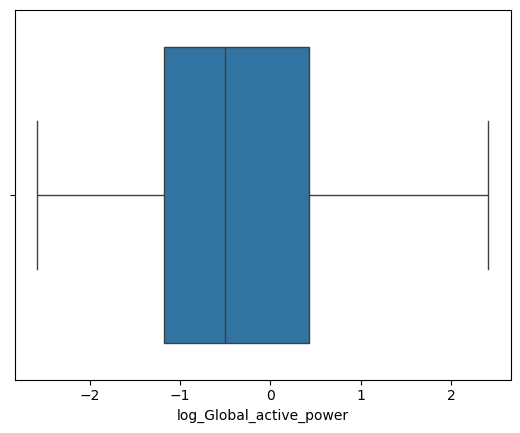

In [115]:
df['log_Global_active_power'] = np.log(df['Global_active_power'])
sns.boxplot(data=df, x='log_Global_active_power')

<Axes: xlabel='sqrt_Global_reactive_power'>

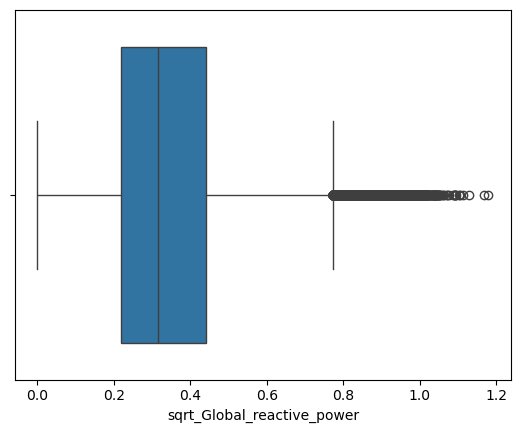

In [111]:
df['sqrt_Global_reactive_power'] = np.sqrt(df['Global_reactive_power'])
sns.boxplot(data=df, x='sqrt_Global_reactive_power')

In [117]:
# Feature selection
# Using Ensemble models 
from sklearn.ensemble import RandomForestRegressor

col_to_drop = ['Global_active_power','Global_intensity','rolling_60min_avg','sqrt_Global_active_power', 'log_Global_active_power','Global_reactive_power','daily_avg_power']
tar = df['Global_active_power']
val = df.drop(col_to_drop, axis=1)

fs = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=99, n_jobs=-1)
fs.fit(val, tar)




RandomForestRegressor(max_depth=10, n_estimators=300, n_jobs=-1,
                      random_state=99)

In [119]:
val

,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,month,weekday,is_peak_hour,sqrt_Global_reactive_power
Datetime,,,,,,,,,,
2006-12-16 17:24:00,234.84,0.0,1.0,17.0,17,16,12,5,1,0.646529
2006-12-16 17:25:00,233.63,0.0,1.0,16.0,17,16,12,5,1,0.660303
2006-12-16 17:26:00,233.29,0.0,2.0,17.0,17,16,12,5,1,0.705691
2006-12-16 17:27:00,233.74,0.0,1.0,17.0,17,16,12,5,1,0.708520
2006-12-16 17:28:00,235.68,0.0,1.0,17.0,17,16,12,5,1,0.726636
...,...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,240.43,0.0,0.0,0.0,20,26,11,4,1,0.000000
2010-11-26 20:59:00,240.00,0.0,0.0,0.0,20,26,11,4,1,0.000000
2010-11-26 21:00:00,239.82,0.0,0.0,0.0,21,26,11,4,1,0.000000


In [121]:
importances = pd.DataFrame({
    "Col": val.columns,
    "Scr": fs.feature_importances_ * 100
}).sort_values("Scr", ascending=False)

print(importances)

                          Col        Scr
3              Sub_metering_3  50.467371
1              Sub_metering_1  20.315707
2              Sub_metering_2  15.343264
4                        hour   5.851442
6                       month   3.151797
0                     Voltage   2.228976
9  sqrt_Global_reactive_power   1.924211
8                is_peak_hour   0.295966
5                         day   0.275599
7                     weekday   0.145668


In [123]:
selected_columns = pd.DataFrame({
    "col": val.columns,
    "score": fs.feature_importances_ * 100
}).sort_values("score", ascending= False).head(6)['col'].to_list()

In [125]:
final_val = val[selected_columns]

In [127]:
final_val

,Sub_metering_3,Sub_metering_1,Sub_metering_2,hour,month,Voltage
Datetime,,,,,,
2006-12-16 17:24:00,17.0,0.0,1.0,17,12,234.84
2006-12-16 17:25:00,16.0,0.0,1.0,17,12,233.63
2006-12-16 17:26:00,17.0,0.0,2.0,17,12,233.29
2006-12-16 17:27:00,17.0,0.0,1.0,17,12,233.74
2006-12-16 17:28:00,17.0,0.0,1.0,17,12,235.68
...,...,...,...,...,...,...
2010-11-26 20:58:00,0.0,0.0,0.0,20,11,240.43
2010-11-26 20:59:00,0.0,0.0,0.0,20,11,240.00
2010-11-26 21:00:00,0.0,0.0,0.0,21,11,239.82


In [129]:
#split values and target
tar

Datetime
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
                       ...  
2010-11-26 20:58:00    0.946
2010-11-26 20:59:00    0.944
2010-11-26 21:00:00    0.938
2010-11-26 21:01:00    0.934
2010-11-26 21:02:00    0.932
Name: Global_active_power, Length: 2049280, dtype: float64

In [131]:
# train and test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

In [133]:
trdata, tsdata, trlab, tslab = train_test_split(final_val, tar, test_size=0.20, random_state=60)

In [135]:
# Train Model
lr_model = LinearRegression()
lr_model.fit(trdata, trlab)

LinearRegression()

In [137]:
# Training performance - Linear Regression
tr_predicted = lr_model.predict(trdata)
mae = mean_absolute_error(trlab, tr_predicted)
rmse = np.sqrt(mean_squared_error(trlab, tr_predicted))
r2 = r2_score(trlab, tr_predicted)

print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R2    : {r2:.4f}")

MAE  : 0.3583
RMSE : 0.5308
R2    : 0.7478


In [139]:
# Test performance - Linear Regression
ts_predicted = lr_model.predict(tsdata)
mae = mean_absolute_error(tslab, ts_predicted)
rmse = np.sqrt(mean_squared_error(tslab, ts_predicted))
r2 = r2_score(tslab, ts_predicted)

print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R2    : {r2:.4f}")

MAE  : 0.3580
RMSE : 0.5303
R2    : 0.7492


In [141]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rfmodel  = RandomForestRegressor(n_estimators= 250,
                                criterion='squared_error',
                                max_depth=10,
                                min_samples_split=2,
                                random_state=98,
    
                               )


rfmodel.fit(trdata, trlab)

RandomForestRegressor(max_depth=10, n_estimators=250, random_state=98)

In [144]:
# Training performance - Random Forest

tr_predicted = rfmodel.predict(trdata)
mae = mean_absolute_error(trlab, tr_predicted)
rmse = np.sqrt(mean_squared_error(trlab, tr_predicted))
r2 = r2_score(trlab, tr_predicted)

print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R2    : {r2:.4f}")

MAE  : 0.2717
RMSE : 0.4345
R2    : 0.8310


In [146]:
# Test performance - Random Forest

ts_predicted = rfmodel.predict(tsdata)
mae = mean_absolute_error(tslab, ts_predicted)
rmse = np.sqrt(mean_squared_error(tslab, ts_predicted))
r2 = r2_score(tslab, ts_predicted)

print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R2    : {r2:.4f}")

MAE  : 0.2730
RMSE : 0.4365
R2    : 0.8301


In [148]:
# Gradient Boosting Model
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=7,
    random_state=52
)

gb_model.fit(trdata, trlab)

GradientBoostingRegressor(max_depth=7, n_estimators=300, random_state=52)

In [150]:
# Training performance - Gradient Boosting

gb_predictions = gb_model.predict(trdata)
mae = mean_absolute_error(trlab, gb_predictions)
rmse = np.sqrt(mean_squared_error(trlab, gb_predictions))
r2 = r2_score(trlab, gb_predictions)

print(f"Gradient Boosting MAE  : {mae:.4f}")
print(f"Gradient Boosting RMSE : {rmse:.4f}")
print(f"Gradient Boosting R2   : {r2:.4f}")

Gradient Boosting MAE  : 0.2469
Gradient Boosting RMSE : 0.4022
Gradient Boosting R2   : 0.8552


In [152]:
# Test performance - Gradient Boosting
gb_predictions = gb_model.predict(tsdata)
mae = mean_absolute_error(tslab, gb_predictions)
rmse = np.sqrt(mean_squared_error(tslab, gb_predictions))
r2 = r2_score(tslab, gb_predictions)

print(f"Gradient Boosting MAE  : {mae:.4f}")
print(f"Gradient Boosting RMSE : {rmse:.4f}")
print(f"Gradient Boosting R2   : {r2:.4f}")

Gradient Boosting MAE  : 0.2492
Gradient Boosting RMSE : 0.4065
Gradient Boosting R2   : 0.8526


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define model
model = GradientBoostingRegressor(random_state=42)

# Define hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

# Setup GridSearch
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit to training data
grid_search.fit(trdata, trlab)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best MAE:", -grid_search.best_score_)

# Best model
best_model = grid_search.best_estimator_


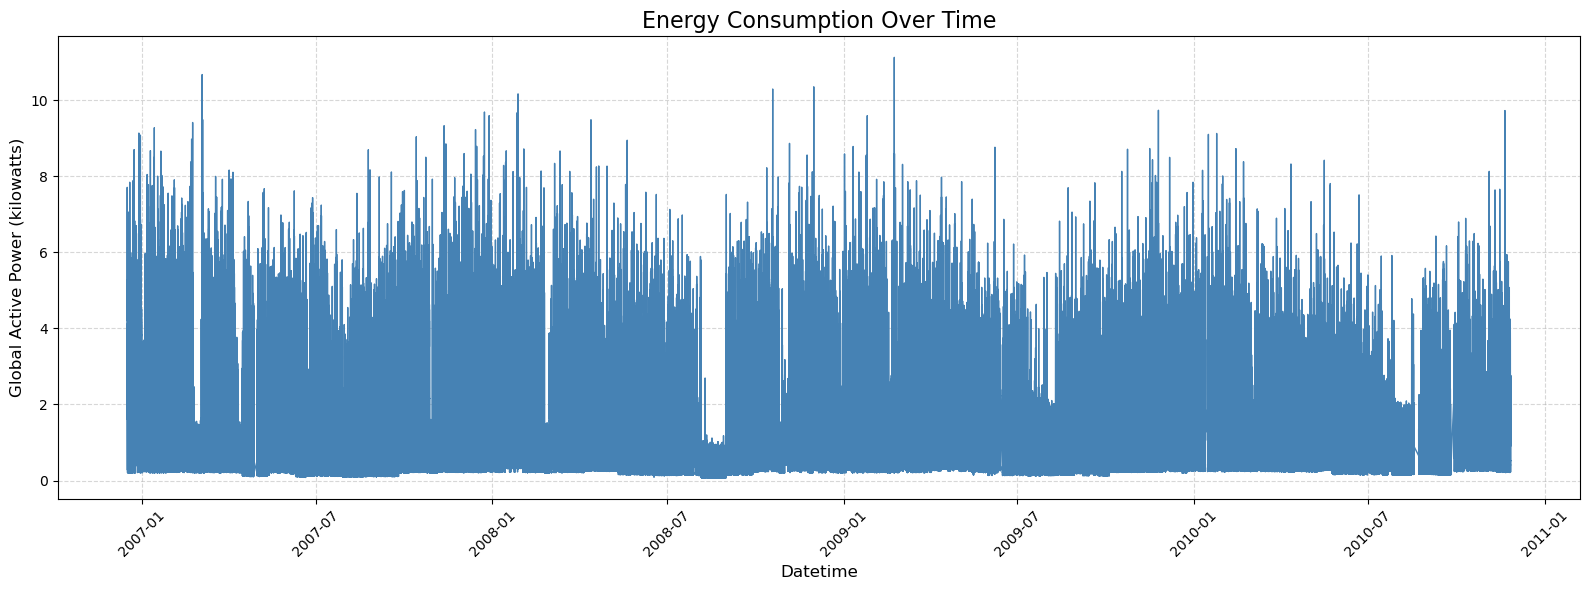

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Convert if needed
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Sort by time (important for line plots)
df = df.sort_values('Datetime')

plt.figure(figsize=(16,6))
sns.lineplot(data=df, x='Datetime', y='Global_active_power', color='steelblue', linewidth=1)

plt.title('Energy Consumption Over Time', fontsize=16)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


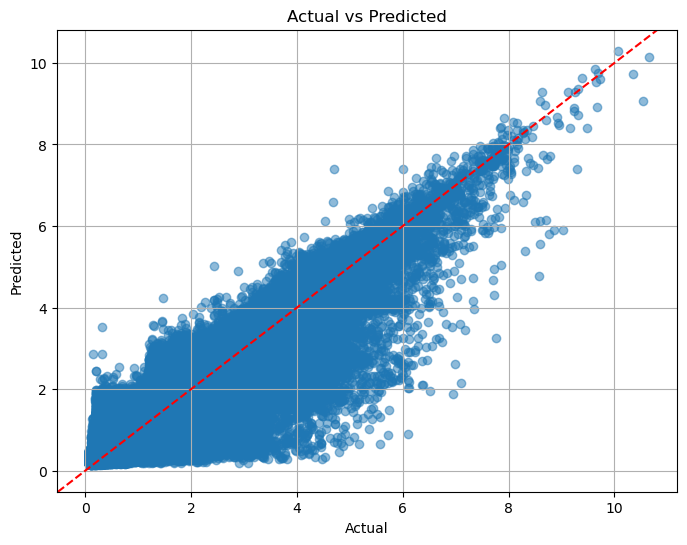

In [158]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(tslab, gb_predictions, alpha=0.5)
plt.axline((0, 0), slope=1, color='r', linestyle='--')  # x = y line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()


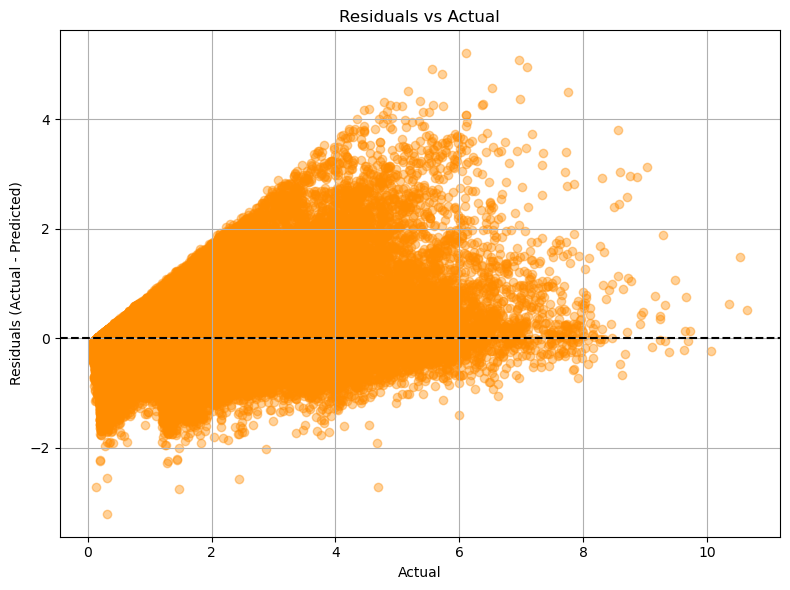

In [160]:
residuals = tslab - gb_predictions

plt.figure(figsize=(8,6))
plt.scatter(tslab, residuals, alpha=0.4, color='darkorange')
plt.axhline(0, linestyle='--', color='black')
plt.xlabel('Actual')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Actual')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_17188\1666057394.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


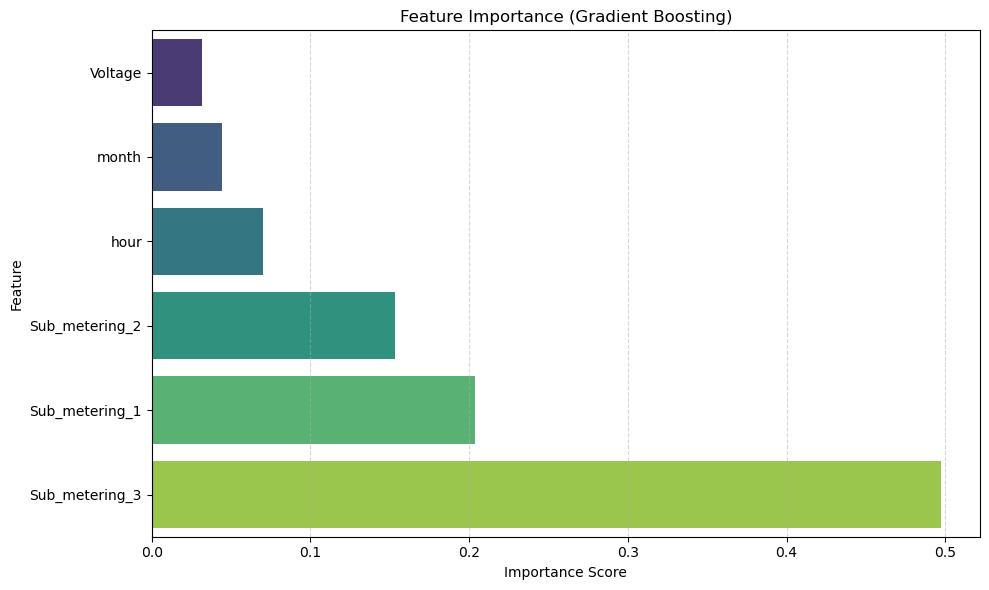

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
feature_importance = pd.Series(gb_model.feature_importances_, index=trdata.columns)
feature_importance = feature_importance.sort_values(ascending=True)  # smallest at top

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')

plt.title('Feature Importance (Gradient Boosting)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
